## Sales Analysis for Electronic products in ten US cities


In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## IMPORT and CONCATENATE all 12 CSV Files (from a same directory)

In [2]:
df = pd.read_csv("./1st_project/Sales_April_2019.csv")

files = [file for file in os.listdir ("./1st_project/")]

dfa = pd.DataFrame()

for file in files:
    df = pd.read_csv("./1st_project/"+file)
    dfa=pd.concat([dfa,df])
    
dfa.to_csv("all_months.csv", index = False)


## CHECK data types for each column and DELETE Error + N.A Values

In [3]:
df = pd.read_csv("all_months.csv")

In [4]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
df.dropna(how="all", inplace = True)

In [6]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
df = df.sort_values(by=["Quantity Ordered"])

In [8]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
93430,211617,iPhone,1,700,06/19/19 18:39,"867 Center St, Seattle, WA 98101"
121455,195008,iPhone,1,700,05/09/19 10:29,"305 Lake St, Seattle, WA 98101"
121456,195009,Bose SoundSport Headphones,1,99.99,05/05/19 07:54,"688 Cherry St, San Francisco, CA 94016"
121458,195011,Wired Headphones,1,11.99,05/13/19 13:43,"440 Walnut St, New York City, NY 10001"
121459,195012,Bose SoundSport Headphones,1,99.99,05/15/19 16:53,"365 Hill St, New York City, NY 10001"
...,...,...,...,...,...,...
13362,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
95838,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
50103,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
75221,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
df.drop(df.index[df["Product"] == "Product"], inplace=True)

In [10]:
df = df.sort_values(by=["Price Each"])

In [11]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1415,177903,20in Monitor,1,109.99,04/26/19 19:39,"50 Lincoln St, Los Angeles, CA 90001"
131844,204887,20in Monitor,1,109.99,05/02/19 07:21,"715 Park St, Boston, MA 02215"
25396,243387,20in Monitor,1,109.99,08/07/19 22:20,"854 Chestnut St, Los Angeles, CA 90001"
74326,147681,20in Monitor,1,109.99,01/05/19 14:38,"935 10th St, Dallas, TX 75001"
145757,287046,20in Monitor,1,109.99,11/20/19 07:47,"749 Spruce St, Seattle, WA 98101"
...,...,...,...,...,...,...
16891,192678,ThinkPad Laptop,1,999.99,04/24/19 11:44,"444 Lakeview St, Los Angeles, CA 90001"
91495,236534,ThinkPad Laptop,1,999.99,07/04/19 15:44,"507 Dogwood St, Los Angeles, CA 90001"
50005,314405,ThinkPad Laptop,1,999.99,12/16/19 15:44,"363 Walnut St, Boston, MA 02215"
11389,187431,ThinkPad Laptop,1,999.99,04/11/19 18:15,"178 12th St, New York City, NY 10001"


## TRANSFORM numeric data into right format

In [12]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

In [14]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [15]:
df = df.sort_values(by=["Quantity Ordered"])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1415,177903,20in Monitor,1,109.99,04/26/19 19:39,"50 Lincoln St, Los Angeles, CA 90001"
64504,159086,AA Batteries (4-pack),1,3.84,02/03/19 17:19,"599 Lakeview St, Portland, OR 97035"
77939,223555,AA Batteries (4-pack),1,3.84,07/08/19 12:52,"812 Chestnut St, Dallas, TX 75001"
182913,255576,AA Batteries (4-pack),1,3.84,09/17/19 08:51,"59 South St, Seattle, WA 98101"
177680,250564,AA Batteries (4-pack),1,3.84,09/04/19 13:11,"829 14th St, Seattle, WA 98101"
...,...,...,...,...,...,...
19563,237807,AAA Batteries (4-pack),8,2.99,08/13/19 11:11,"89 Church St, Portland, OR 97035"
149933,291034,AAA Batteries (4-pack),8,2.99,11/09/19 16:30,"268 Willow St, Dallas, TX 75001"
92877,211097,AAA Batteries (4-pack),9,2.99,06/23/19 08:29,"338 Hickory St, Los Angeles, CA 90001"
81010,226483,AAA Batteries (4-pack),9,2.99,07/20/19 23:28,"867 Sunset St, San Francisco, CA 94016"


## CREATE additional Columns for Analysis : Order Value, Month, State, City
## and DELETE Duplicates


In [16]:
df["Order Value"] = df["Price Each"] * df["Quantity Ordered"]

In [17]:
df["M"] = df["Order Date"].str.slice(0,2)
df = df.sort_values(by=["M"])

In [18]:
df['State'] = df['Purchase Address'].str.slice(-8,-6)
df['City'] = df['Purchase Address'].str.split(',').str[1]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Value,M,State,City
70963,144482,Apple Airpods Headphones,1,150.00,01/25/19 20:40,"76 11th St, Los Angeles, CA 90001",150.00,01,CA,Los Angeles
68470,142116,AA Batteries (4-pack),1,3.84,01/09/19 18:54,"568 5th St, San Francisco, CA 94016",3.84,01,CA,San Francisco
74525,147871,AAA Batteries (4-pack),2,2.99,01/06/19 01:58,"354 14th St, Los Angeles, CA 90001",5.98,01,CA,Los Angeles
68387,142039,Google Phone,1,600.00,01/31/19 16:13,"549 Cherry St, New York City, NY 10001",600.00,01,NY,New York City
73558,146956,Apple Airpods Headphones,1,150.00,01/30/19 09:02,"268 Forest St, New York City, NY 10001",150.00,01,NY,New York City
...,...,...,...,...,...,...,...,...,...,...
37307,302263,20in Monitor,1,109.99,12/07/19 10:37,"513 Park St, Boston, MA 02215",109.99,12,MA,Boston
51206,315545,Bose SoundSport Headphones,1,99.99,12/27/19 18:17,"553 14th St, New York City, NY 10001",99.99,12,NY,New York City
40747,305541,AA Batteries (4-pack),1,3.84,12/04/19 11:46,"582 Spruce St, New York City, NY 10001",3.84,12,NY,New York City
46602,311157,Bose SoundSport Headphones,1,99.99,12/07/19 00:29,"218 Willow St, Boston, MA 02215",99.99,12,MA,Boston


In [32]:
df["Find duplicate"] = df["Purchase Address"].str.cat(df[["Product","Quantity Ordered","Price Each","Order Date"]].astype(str), sep = "-")
df
df = df.drop_duplicates(subset="Find duplicate", keep="last")
df.drop('Find duplicate', axis=1, inplace=True)
df["Location"] = df["State"].str.cat(df["City"].astype(str), sep = "-")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Value,M,State,City,Location
73921,147297,AAA Batteries (4-pack),2,2.99,01/02/19 07:47,"232 7th St, San Francisco, CA 94016",5.98,01,CA,San Francisco,CA- San Francisco
76550,149816,AAA Batteries (4-pack),1,2.99,01/29/19 16:06,"592 8th St, San Francisco, CA 94016",2.99,01,CA,San Francisco,CA- San Francisco
75269,148592,Lightning Charging Cable,2,14.95,01/28/19 14:05,"63 12th St, San Francisco, CA 94016",29.90,01,CA,San Francisco,CA- San Francisco
76507,149774,AAA Batteries (4-pack),1,2.99,01/06/19 11:47,"2 Church St, San Francisco, CA 94016",2.99,01,CA,San Francisco,CA- San Francisco
77113,150348,AAA Batteries (4-pack),1,2.99,01/03/19 13:33,"315 Chestnut St, San Francisco, CA 94016",2.99,01,CA,San Francisco,CA- San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
44029,308673,Lightning Charging Cable,1,14.95,12/14/19 22:19,"891 Jackson St, Los Angeles, CA 90001",14.95,12,CA,Los Angeles,CA- Los Angeles
44553,309174,AA Batteries (4-pack),1,3.84,12/12/19 00:21,"218 Adams St, Los Angeles, CA 90001",3.84,12,CA,Los Angeles,CA- Los Angeles
43187,307874,Lightning Charging Cable,1,14.95,12/06/19 13:01,"369 Church St, Los Angeles, CA 90001",14.95,12,CA,Los Angeles,CA- Los Angeles
37899,302822,Apple Airpods Headphones,1,150.00,12/23/19 11:38,"532 Willow St, Los Angeles, CA 90001",150.00,12,CA,Los Angeles,CA- Los Angeles


In [20]:
df=df.sort_values(by=["State"])
df=df.sort_values(by=["City"])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Value,M,State,City,Location
141364,282851,AA Batteries (4-pack),1,3.84,11/02/19 10:16,"839 4th St, Atlanta, GA 30301",3.84,11,GA,Atlanta,GA- Atlanta
90395,235479,Lightning Charging Cable,1,14.95,07/03/19 18:49,"407 Spruce St, Atlanta, GA 30301",14.95,07,GA,Atlanta,GA- Atlanta
125367,198722,USB-C Charging Cable,2,11.95,05/27/19 16:28,"807 4th St, Atlanta, GA 30301",23.90,05,GA,Atlanta,GA- Atlanta
35176,300212,Flatscreen TV,1,300.00,12/06/19 20:34,"476 12th St, Atlanta, GA 30301",300.00,12,GA,Atlanta,GA- Atlanta
21924,240073,Bose SoundSport Headphones,1,99.99,08/08/19 15:52,"162 Park St, Atlanta, GA 30301",99.99,08,GA,Atlanta,GA- Atlanta
...,...,...,...,...,...,...,...,...,...,...,...
72852,146277,Flatscreen TV,1,300.00,01/08/19 23:54,"327 Lake St, Seattle, WA 98101",300.00,01,WA,Seattle,WA- Seattle
81235,226700,Bose SoundSport Headphones,1,99.99,07/21/19 16:47,"866 North St, Seattle, WA 98101",99.99,07,WA,Seattle,WA- Seattle
162907,267118,AAA Batteries (4-pack),1,2.99,10/28/19 15:50,"386 1st St, Seattle, WA 98101",2.99,10,WA,Seattle,WA- Seattle
132824,205818,34in Ultrawide Monitor,1,379.99,05/02/19 13:11,"815 2nd St, Seattle, WA 98101",379.99,05,WA,Seattle,WA- Seattle


In [21]:
df=df.sort_values(by=["M"])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Value,M,State,City,Location
73921,147297,AAA Batteries (4-pack),2,2.99,01/02/19 07:47,"232 7th St, San Francisco, CA 94016",5.98,01,CA,San Francisco,CA- San Francisco
76550,149816,AAA Batteries (4-pack),1,2.99,01/29/19 16:06,"592 8th St, San Francisco, CA 94016",2.99,01,CA,San Francisco,CA- San Francisco
75269,148592,Lightning Charging Cable,2,14.95,01/28/19 14:05,"63 12th St, San Francisco, CA 94016",29.90,01,CA,San Francisco,CA- San Francisco
76507,149774,AAA Batteries (4-pack),1,2.99,01/06/19 11:47,"2 Church St, San Francisco, CA 94016",2.99,01,CA,San Francisco,CA- San Francisco
77113,150348,AAA Batteries (4-pack),1,2.99,01/03/19 13:33,"315 Chestnut St, San Francisco, CA 94016",2.99,01,CA,San Francisco,CA- San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
44029,308673,Lightning Charging Cable,1,14.95,12/14/19 22:19,"891 Jackson St, Los Angeles, CA 90001",14.95,12,CA,Los Angeles,CA- Los Angeles
44553,309174,AA Batteries (4-pack),1,3.84,12/12/19 00:21,"218 Adams St, Los Angeles, CA 90001",3.84,12,CA,Los Angeles,CA- Los Angeles
43187,307874,Lightning Charging Cable,1,14.95,12/06/19 13:01,"369 Church St, Los Angeles, CA 90001",14.95,12,CA,Los Angeles,CA- Los Angeles
37899,302822,Apple Airpods Headphones,1,150.00,12/23/19 11:38,"532 Willow St, Los Angeles, CA 90001",150.00,12,CA,Los Angeles,CA- Los Angeles


## CREATE Sub dataset Sales by State-City for analysis

In [22]:
df2 = df.groupby(["Location"]).sum().sort_values(by=["Order Value"], ascending = False).drop('Price Each', axis =1)
df2['Quantity Ordered rank'] = df2['Quantity Ordered'].rank()
df2['Order Value rank'] = df2['Order Value'].rank()

In [23]:
df2["% Order Value"]=df2['Order Value'] / df2['Order Value'].sum()  * 100
df2["Accumulate"]=df2["% Order Value"].cumsum()
df2

,Quantity Ordered,Order Value,Quantity Ordered rank,Order Value rank,% Order Value,Accumulate
Location,,,,,,
CA- San Francisco,50169,8254743.55,10.0,10.0,23.950717,23.950717
CA- Los Angeles,33247,5448304.28,9.0,9.0,15.807977,39.758694
NY- New York City,27903,4661867.14,8.0,8.0,13.526170,53.284864
MA- Boston,22494,3658627.65,7.0,7.0,10.615321,63.900185
GA- Atlanta,16584,2794199.07,5.0,6.0,8.107226,72.007411
TX- Dallas,16707,2765373.96,6.0,5.0,8.023591,80.031003
WA- Seattle,16534,2745046.02,4.0,4.0,7.964611,87.995614
OR- Portland,11291,1870010.56,3.0,3.0,5.425740,93.421354
TX- Austin,11137,1818044.33,2.0,2.0,5.274963,98.696317


<AxesSubplot:xlabel='Location'>

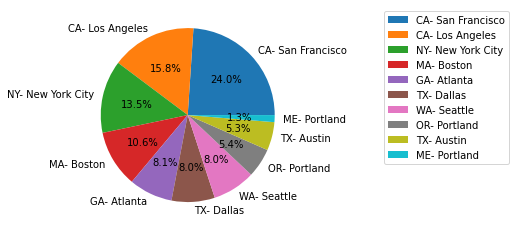

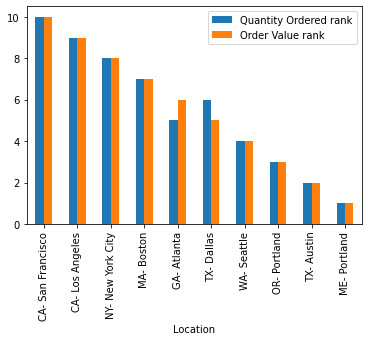

In [24]:
df2.plot.pie(y="% Order Value",autopct='%.1f%%')
plt.legend(loc="best", fontsize=10, bbox_to_anchor=(2,1))
plt.ylabel("")

df2.plot.bar(y =["Quantity Ordered rank", "Order Value rank"])


$\color{green}{\text{We see clearly that Sales Value are highly contributed by San Francisco, Los Angeles, New York and Boston. These 4 cities takes up 64% of all Sales Value}}$

## CREATE Sub dataset Sales by Month for analysis

In [25]:
df3 = df.groupby(["M"]).sum().sort_values(by=["Order Value"]).drop('Price Each', axis =1)
df3['Quantity Ordered rank'] = df3['Quantity Ordered'].rank()
df3['Order Value rank'] = df3['Order Value'].rank()
df3.sort_values(by=["M"], inplace = True)
df3["% Order Value"]=df3['Order Value'] / df3['Order Value'].sum()  * 100
df3["Accumulate"]=df3["% Order Value"].cumsum()
df3


,Quantity Ordered,Order Value,Quantity Ordered rank,Order Value rank,% Order Value,Accumulate
M,,,,,,
01,10893,1821413.16,1.0,1.0,5.284737,5.284737
02,13431,2200078.08,4.0,3.0,6.383414,11.668152
03,16979,2804973.35,7.0,7.0,8.138487,19.806639
04,20536,3389217.98,10.0,10.0,9.833643,29.640282
05,18653,3150616.23,8.0,8.0,9.141352,38.781634
06,15234,2576280.15,5.0,5.0,7.474945,46.256579
07,16054,2646461.32,6.0,6.0,7.678573,53.935152
08,13429,2241083.37,3.0,4.0,6.502389,60.437541
09,13091,2094465.69,2.0,2.0,6.076985,66.514526


<AxesSubplot:xlabel='M'>

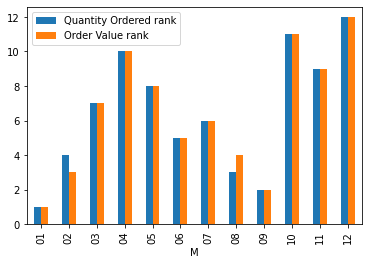

In [26]:
df3.plot.bar(y =["Quantity Ordered rank", "Order Value rank"])

$\color{green}{\text{We see that although Sales (both in Qty and Value) are highly concentrated in end of year period (10,11,12 - Xmas season), they are equally distributed between two semester : From 1=>6 : 46%, From 7=>12 : 54%}}$


$\color{green}{\text{Also, it is easy to remark that after the two most quite months are 9 - before the season and 1 - after the season}}$ 



## CREATE Sub dataset Sales by product for analysis 

In [27]:
df4 = df.groupby(["Product"]).sum().sort_values(by=["Order Value"], ascending = False).drop('Price Each', axis =1)
df4['Quantity Ordered rank'] = df4['Quantity Ordered'].rank()
df4['Order Value rank'] = df4['Order Value'].rank()
df4["% Order Value"]=df4['Order Value'] / df4['Order Value'].sum()  * 100
df4["Accumulate"]=df4["% Order Value"].cumsum()
df4

,Quantity Ordered,Order Value,Quantity Ordered rank,Order Value rank,% Order Value,Accumulate
Product,,,,,,
Macbook Pro Laptop,4725,8032500.00,6.0,19.0,23.305889,23.305889
iPhone,6847,4792900.00,11.0,18.0,13.906355,37.212244
ThinkPad Laptop,4128,4127958.72,5.0,17.0,11.977062,49.189305
Google Phone,5529,3317400.00,8.0,16.0,9.625267,58.814572
27in 4K Gaming Monitor,6239,2433147.61,10.0,15.0,7.059654,65.874226
34in Ultrawide Monitor,6192,2352898.08,9.0,14.0,6.826814,72.701040
Apple Airpods Headphones,15637,2345550.00,14.0,13.0,6.805494,79.506533
Flatscreen TV,4813,1443900.00,7.0,12.0,4.189402,83.695936
Bose SoundSport Headphones,13430,1342865.70,13.0,11.0,3.896256,87.592192


<AxesSubplot:xlabel='Product'>

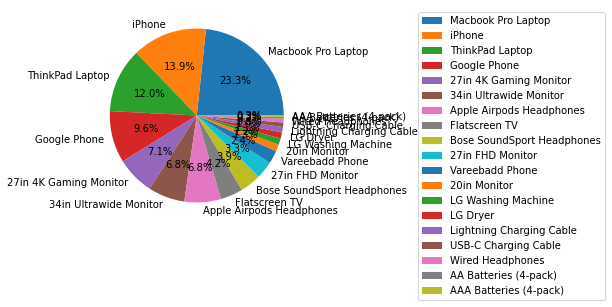

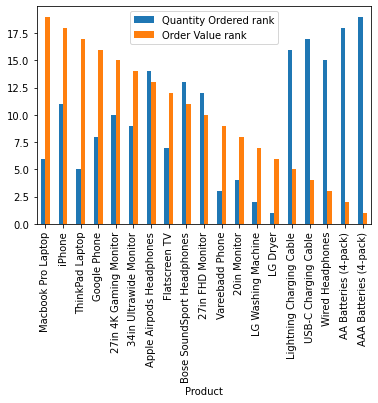

In [28]:
df4.plot.pie(y="% Order Value", autopct='%.1f%%')
plt.legend(loc="best", fontsize=10, bbox_to_anchor=(2.4,1))
plt.ylabel("")

df4.plot.bar(y =["Quantity Ordered rank", "Order Value rank"])


$\color{green}{\text{Two interesting insights that can be quickly observed here : The 3 best sellers represent 50% Sales Value but in term of Sales Quantity, they can only make it to the top 9. }}$

$\color{green}{\text{t is easy to understand because those are high value items : Macbook, iPhone and Laptop. }}$


## CREATE Sub Dataset of Macbook Sales by Month (best seller item)

In [29]:
df5 = df.groupby(["Product", "M"]).sum().sort_values(by=["M"]).drop('Price Each', axis =1)
df5.query("Product == 'Macbook Pro Laptop'", inplace = True)
df5["% Order Value"]=df5['Order Value'] / df5['Order Value'].sum()  * 100
df5["Accumulate"]=df5["% Order Value"].cumsum()
df5


Quantity Ordered  Order Value  % Order Value  \
Product            M                                                  
Macbook Pro Laptop 01               235     399500.0       4.973545   
                   02               276     469200.0       5.841270   
                   03               379     644300.0       8.021164   
                   04               454     771800.0       9.608466   
                   05               464     788800.0       9.820106   
                   06               356     605200.0       7.534392   
                   07               368     625600.0       7.788360   
                   08               298     506600.0       6.306878   
                   09               287     487900.0       6.074074   
                   10               525     892500.0      11.111111   
                   11               440     748000.0       9.312169   
                   12               643    1093100.0      13.608466   

                       Accumulate  
Product            M               
Macbook Pro Laptop 01    4.973545  
                   02   10.814815  
                   03   18.835979  
                   04   28.444444  
                   05   38.264550  
                   06   45.798942  
                   07   53.587302  
                   08   59.894180  
                   09   65.968254  
                   10   77.079365  
                   11   86.391534  
                   12  100.000000

$\color{green}{\text{We can see here that the Macbook Sales are also equally distributed between 1st and 2nd semesters. But it is quite interesting to see that we got a lot Macbook purchases during EoY - Xmas period => US people offer Macbook as Xmas gift !!!  }}$

## CREATE Sub dataset for Product Sales in December (best seller month)

In [30]:
df6 = df.groupby(["M", "Product"]).sum().sort_values(by=["Order Value"], ascending = False).drop('Price Each', axis =1)
df6.query("M == '12'", inplace = True)
df6["% Order Value"]=df6['Order Value'] / df6['Order Value'].sum()  * 100
df6["Accumulate"]=df6["% Order Value"].cumsum()
df6

Quantity Ordered  Order Value  % Order Value  \
M  Product                                                                    
12 Macbook Pro Laptop                       643   1093100.00      23.720266   
   iPhone                                   906    634200.00      13.762138   
   ThinkPad Laptop                          537    536994.63      11.652782   
   Google Phone                             715    429000.00       9.309298   
   27in 4K Gaming Monitor                   862    336171.38       7.294918   
   34in Ultrawide Monitor                   848    322231.52       6.992423   
   Apple Airpods Headphones                2071    310650.00       6.741104   
   Flatscreen TV                            664    199200.00       4.322639   
   Bose SoundSport Headphones              1820    181981.80       3.949004   
   27in FHD Monitor                         962    144290.38       3.131101   
   Vareebadd Phone                          284    113600.00       2.465120   
   20in Monitor                             569     62584.31       1.358079   
   LG Dryer                                  86     51600.00       1.119720   
   LG Washing Machine                        80     48000.00       1.041600   
   Lightning Charging Cable                3081     46060.95       0.999522   
   USB-C Charging Cable                    3249     38825.55       0.842514   
   Wired Headphones                        2740     32852.60       0.712901   
   AA Batteries (4-pack)                   3719     14280.96       0.309897   
   AAA Batteries (4-pack)                  4238     12671.62       0.274974   

                               Accumulate  
M  Product                                 
12 Macbook Pro Laptop           23.720266  
   iPhone                       37.482404  
   ThinkPad Laptop              49.135185  
   Google Phone                 58.444484  
   27in 4K Gaming Monitor       65.739401  
   34in Ultrawide Monitor       72.731824  
   Apple Airpods Headphones     79.472928  
   Flatscreen TV                83.795567  
   Bose SoundSport Headphones   87.744572  
   27in FHD Monitor             90.875673  
   Vareebadd Phone              93.340792  
   20in Monitor                 94.698871  
   LG Dryer                     95.818591  
   LG Washing Machine           96.860191  
   Lightning Charging Cable     97.859714  
   USB-C Charging Cable         98.702228  
   Wired Headphones             99.415129  
   AA Batteries (4-pack)        99.725026  
   AAA Batteries (4-pack)      100.000000

$\color{green}{\text{ The top 3 selling items in the best selling month are also the top 3 selling items of all year (in term of Order Value)}}$

### A bonus lines of code for automatic kernel restart  (thanks Suraj Potnuru from Stackoverflow)

In [31]:
from IPython.display import HTML, Javascript, display

def initialize():
    display(HTML(
        '''
            <script>
                code_show = false;
                function restart_run_all(){
                    IPython.notebook.kernel.restart();
                    setTimeout(function(){
                        IPython.notebook.execute_all_cells();
                    }, 10000)
                }
                function code_toggle() {
                    if (code_show) {
                        $('div.input').hide(200);
                    } else {
                        $('div.input').show(200);
                    }
                    code_show = !code_show
                }
            </script>
            <button onclick="code_toggle()">Click to toggle</button>
            <button onclick="restart_run_all()">Click to Restart and Run all Cells</button>
        '''
    ))
initialize()